# Parcial 1 

**Integrantes**

* Jean C. Trujillo P.
* Juan J. Cervantes S.
* Fernando A. Oliveros O.
* Ricardo Pacheco

**Tema: Minas y Energias**

 # Información de la data
**Titulo:**  Meta FNCER: Incorporar en la matriz energética nueva capacidad instalada a partir de Fuentes No Convencionales de Energía Renovable - FNCER

**Descripción (proporcionada por la página):**

Incluye informes de capacidad instalada FNCER instalada o pruebas de matriz de producción. En cada corte OR se consideran los proyectos reportados directamente por los agentes, los proyectos registrados en PARATEC (http://paratec.xm.com.co/paratec/SitePages/generacion.aspx?q=capacity) y los proyectos pequeños reportados por los agentes. Las metas son mediciones en diferentes horizontes. La meta de 1500 MW se fijó en el plan nacional de desarrollo para terminar el gobierno. Sin embargo, a fines de 2022, puede superar los 2.000 MW.

**Resumen de la data:**

Lo que se indica en el texto es que se están llevando a cabo informes sobre la capacidad instalada de las Fuentes No Convencionales de Energía Renovable (FNCER) y pruebas de matriz de producción. Estos informes incluyen proyectos informados directamente por los agentes, proyectos registrados en PARATEC y proyectos pequeños informados por los agentes.

En resumen, se trata de un proceso de medición y registro de la capacidad instalada de las FNCER en Colombia, con el objetivo de alcanzar metas específicas en términos de generación de energía renovable. Se espera que se supere la meta originalmente establecida para fines del 2022.

Con esa información, nos enfocaremos específicamente en estos datos:

 * Energía [kWh/día]
 * Emisiones CO2 [Ton/año]
 * Inversion estimada
 * Departamento
 * Municipios 
 * Tipo
 




In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt


**Cargar el archivo csv.**

In [ ]:
data = pd.read_csv('MetaFNCER.csv')
data

,Proyecto,Tipo,Capacidad,Departamento,Municipio,Código Departamento,Código Municipio,Fecha estimada FPO,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año]
0,JEPIRACHI,Eólico,18.42,LA GUAJIRA,URIBIA,44,44847,2004-04-27T00:00:00.000,176832,30665,79206000000,51,51635
1,AUTOG CELSIA SOLAR YUMBO,Solar,9.80,VALLE DEL CAUCA,YUMBO,76,76892,2017-03-09T00:00:00.000,47040,8157,42140000000,68,13736
2,CELSIA SOLAR BOLIVAR,Solar,8.06,BOLÍVAR,SANTA ROSA,13,13683,2019-02-01T00:00:00.000,38688,6709,34658000000,56,11297
3,EL PASO SOLAR (ENEL GREEN POWER),Solar,67.00,CESAR,EL PASO,20,20250,2019-04-05T00:00:00.000,321600,55769,288100000000,466,93907
4,SOLAR CASTILLA ECP,Solar,20.00,META,CASTILLA LA NUEVA,50,50150,2019-10-10T00:00:00.000,96000,16647,86000000000,139,28032
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,BUGA 1 PARTE 2,Solar,5.94,VALLE DEL CAUCA,"""""",76,76,2022-12-31T00:00:00.000,28512,4944,22275000000,41,8326
154,BUGA 1 PARTE 1,Solar,3.96,VALLE DEL CAUCA,"""""",76,76,2022-07-31T00:00:00.000,19008,3296,14850000000,28,5550
155,REFINERÍA GRB,Solar,21.00,SANTANDER,BARRANCABERMEJA,68,68081,2023-12-31T00:00:00.000,100800,17480,78750000000,146,29434
156,EMSA GD Y AG (34 Proyectos),Solar,1.90,META,VILLAVICENCIO,50,50001,2022-05-31T00:00:00.000,9120,1582,8170000000,13,2663


A continuacion podemos ver el resultado de la tabla de la data que va a ser analizada.

**Mostrar los 5 primeros registros**

In [ ]:
data.head()

,Proyecto,Tipo,Capacidad,Departamento,Municipio,Código Departamento,Código Municipio,Fecha estimada FPO,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año]
0,JEPIRACHI,Eólico,18.42,LA GUAJIRA,URIBIA,44,44847,2004-04-27T00:00:00.000,176832,30665,79206000000,51,51635
1,AUTOG CELSIA SOLAR YUMBO,Solar,9.80,VALLE DEL CAUCA,YUMBO,76,76892,2017-03-09T00:00:00.000,47040,8157,42140000000,68,13736
2,CELSIA SOLAR BOLIVAR,Solar,8.06,BOLÍVAR,SANTA ROSA,13,13683,2019-02-01T00:00:00.000,38688,6709,34658000000,56,11297
3,EL PASO SOLAR (ENEL GREEN POWER),Solar,67.00,CESAR,EL PASO,20,20250,2019-04-05T00:00:00.000,321600,55769,288100000000,466,93907
4,SOLAR CASTILLA ECP,Solar,20.00,META,CASTILLA LA NUEVA,50,50150,2019-10-10T00:00:00.000,96000,16647,86000000000,139,28032


Aquí vemos los cinco primeros registro de la data


#Información de los datos
Visualizamos los datos de la data, con el método .info() donde se mostrará cada columna, filas, cantidad de datos, sí hay datos nulos y el tipo de dato de esa fila en específico



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Proyecto                  158 non-null    object 
 1   Tipo                      158 non-null    object 
 2   Capacidad                 158 non-null    float64
 3   Departamento              158 non-null    object 
 4   Municipio                 158 non-null    object 
 5   Código Departamento       158 non-null    int64  
 6   Código Municipio          158 non-null    int64  
 7   Fecha estimada FPO        158 non-null    object 
 8   Energía [kWh/día]         158 non-null    int64  
 9   Usuarios                  158 non-null    int64  
 10  Inversión estimada [COP]  158 non-null    int64  
 11  Empleos estimados         158 non-null    int64  
 12  Emisiones CO2 [Ton/año]   158 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 16.2+ KB


Se obtiene un total de 13 columnas con los siguientes tipos de datos:

* Float64 - 1 columnas
* int64 - 7 columnas
* object - 5 columnas

Teniendo un total de **158** filas.

Para mayor comprención tenemos **8** columnas de tipo **numerico** y **5** de tipo texto donde nos enfocaremos especificamente en:

 * Energía [kWh/día]
 * Emisiones CO2 [Ton/año]
 * Departamento
 * Municipios 
 * Tipo 
 * Inversion estimada


 **¿Por qué enfocarnos en estas columnas?**

 Para tener clarida de como fueron los resultados de la mediciones realizadas nos enfocaremos en los **Departamentos** y **Municipios** en las que estas fueron realizadas asi como fueron los resultados de estas en los consumos de **energia** y **emisiones** verificando los valores de la **inversion que se estimo** como el **tipo** de la misma.

# Datos nulos

Antes de empezar podemos observar que no hay ningun dato que falte en las columnas de la tabla.

In [ ]:
data.isnull().sum()

Proyecto                    0
Tipo                        0
Capacidad                   0
Departamento                0
Municipio                   0
Código Departamento         0
Código Municipio            0
Fecha estimada FPO          0
Energía [kWh/día]           0
Usuarios                    0
Inversión estimada [COP]    0
Empleos estimados           0
Emisiones CO2 [Ton/año]     0
dtype: int64

#Grupo de filas
Usamos data.iloc, podemos visualizar un rango de filas de la data.

In [ ]:
data.iloc[5:10]

,Proyecto,Tipo,Capacidad,Departamento,Municipio,Código Departamento,Código Municipio,Fecha estimada FPO,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año]
5,AGPE TECNOEMPAQUES DE OCCIDENTE,Solar,0.10,VALLE DEL CAUCA,CALI,76,76001,2019-12-19T00:00:00.000,480,83,430000000,1,140
6,RADAR FAC SAN ANDRÉS,Solar,0.01,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",SAN ANDRÉS,88,88001,2019-12-30T00:00:00.000,48,8,43000000,0,14
7,AGPE SFV MCDONALDS SOLEDAD,Solar,0.09,ATLÁNTICO,SOLEDAD,8,8758,2020-02-27T00:00:00.000,432,75,387000000,1,126
8,CELSIA SOLAR ESPINAL,Solar,9.90,TOLIMA,ESPINAL,73,73268,2020-05-31T00:00:00.000,47520,8240,42570000000,69,13876
9,FEDERACIÓN NACIONAL DE CAFETEROS,Solar,0.08,TOLIMA,IBAGUÉ,73,73001,2020-09-02T00:00:00.000,384,67,344000000,1,112


# Grupo de columnas
Para poder seleccionar un grupo de columnas que tengamos en la data, se hace usando doble corchete y colocando el nombre de la columna.

In [ ]:
data[['Departamento', 'Municipio','Tipo']]

,Departamento,Municipio,Tipo
0,LA GUAJIRA,URIBIA,Eólico
1,VALLE DEL CAUCA,YUMBO,Solar
2,BOLÍVAR,SANTA ROSA,Solar
3,CESAR,EL PASO,Solar
4,META,CASTILLA LA NUEVA,Solar
...,...,...,...
153,VALLE DEL CAUCA,"""""",Solar
154,VALLE DEL CAUCA,"""""",Solar
155,SANTANDER,BARRANCABERMEJA,Solar
156,META,VILLAVICENCIO,Solar


# Consulta de tres campos cuantitativos
# Muestra general
Acá podemos ver una vista estadística general de la data


In [ ]:
data.describe()

,Capacidad,Código Departamento,Código Municipio,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año]
count,158.000000,158.000000,158.000000,1.580000e+02,158.000000,1.580000e+02,158.000000,158.000000
mean,37.971646,42.829114,41551.797468,2.312960e+05,40109.063291,1.450582e+11,221.607595,67538.462025
std,78.068671,26.605922,27283.549553,5.070385e+05,87925.819429,2.938303e+11,485.174312,148055.230112
min,0.010000,5.000000,23.000000,2.100000e+01,4.000000,9.800000e+06,0.000000,6.000000
25%,2.275000,17.500000,13675.500000,1.092000e+04,1893.750000,9.513750e+09,16.000000,3189.000000
50%,9.900000,44.000000,44847.000000,4.752000e+04,8240.000000,3.963250e+10,69.000000,13876.000000
75%,20.750000,70.000000,68514.750000,1.123800e+05,19487.750000,8.557000e+10,144.250000,32814.750000
max,700.000000,94.000000,94001.000000,3.360000e+06,582659.000000,2.625000e+12,4872.000000,981120.000000


# Media

Al calcular la media de la columna **Emisiones** el resultado que obtenemos el el siguiente.

In [ ]:
data['Emisiones CO2 [Ton/año]'].mean()

67538.46202531646

Podemos decir que el promedio de los datos que están en la columna de **emisiones** es igual a **67538.46202531646**

#Mediana

Posteriormente procedemos a realizar la mediana para la misma columna la cual tiene por nombre **emisiones**

In [ ]:
data['Emisiones CO2 [Ton/año]'].median()

13876.0

Llegando a la conclución de que el la cantidad repetida de **emisiones** es equivalente a **13876.0**

# Maximo
Luego podemos obtener los valores máximos de la columna Emisiones CO2 [Ton/año], Con el método .max() 

In [ ]:
data['Emisiones CO2 [Ton/año]'].max()

981120

Podemos observar que el maximo de la columna Emisiones CO2 [Ton/año] es de **981120**


# Mínimo
Para que podemos obtener los valores mínimos de la columna Emisiones CO2 [Ton/año], lo hacemos con el método .max() 

In [ ]:
data['Emisiones CO2 [Ton/año]'].min()

6

Vemos que el valor minimo de la columna Emisiones CO2 [Ton/año] es de 6

# Moda
Con la moda, podemos sacar el valor que se repite con mayor frecuencia en las columnas

In [ ]:
data['Emisiones CO2 [Ton/año]'].mode()

0    13876
Name: Emisiones CO2 [Ton/año], dtype: int64

Observamos que el valor de moda es decir el valor que mas se repite en la columna Emisiones CO2 [Ton/año] es de 0    13876
Name: Emisiones CO2 [Ton/año], dtype: int64

# 

In [ ]:
data.describe()

,Capacidad,Código Departamento,Código Municipio,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año]
count,158.000000,158.000000,158.000000,1.580000e+02,158.000000,1.580000e+02,158.000000,158.000000
mean,37.971646,42.829114,41551.797468,2.312960e+05,40109.063291,1.450582e+11,221.607595,67538.462025
std,78.068671,26.605922,27283.549553,5.070385e+05,87925.819429,2.938303e+11,485.174312,148055.230112
min,0.010000,5.000000,23.000000,2.100000e+01,4.000000,9.800000e+06,0.000000,6.000000
25%,2.275000,17.500000,13675.500000,1.092000e+04,1893.750000,9.513750e+09,16.000000,3189.000000
50%,9.900000,44.000000,44847.000000,4.752000e+04,8240.000000,3.963250e+10,69.000000,13876.000000
75%,20.750000,70.000000,68514.750000,1.123800e+05,19487.750000,8.557000e+10,144.250000,32814.750000
max,700.000000,94.000000,94001.000000,3.360000e+06,582659.000000,2.625000e+12,4872.000000,981120.000000


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Capacidad,158.0,3.797165e+01,7.806867e+01,0.01,2.275000e+00,9.900000e+00,2.075000e+01,7.000000e+02
Código Departamento,158.0,4.282911e+01,2.660592e+01,5.00,1.750000e+01,4.400000e+01,7.000000e+01,9.400000e+01
Código Municipio,158.0,4.155180e+04,2.728355e+04,23.00,1.367550e+04,4.484700e+04,6.851475e+04,9.400100e+04
Energía [kWh/día],158.0,2.312960e+05,5.070385e+05,21.00,1.092000e+04,4.752000e+04,1.123800e+05,3.360000e+06
Usuarios,158.0,4.010906e+04,8.792582e+04,4.00,1.893750e+03,8.240000e+03,1.948775e+04,5.826590e+05
Inversión estimada [COP],158.0,1.450582e+11,2.938303e+11,9800000.00,9.513750e+09,3.963250e+10,8.557000e+10,2.625000e+12
Empleos estimados,158.0,2.216076e+02,4.851743e+02,0.00,1.600000e+01,6.900000e+01,1.442500e+02,4.872000e+03
Emisiones CO2 [Ton/año],158.0,6.753846e+04,1.480552e+05,6.00,3.189000e+03,1.387600e+04,3.281475e+04,9.811200e+05


In [ ]:
data.describe(include='O')

,Proyecto,Tipo,Departamento,Municipio,Fecha estimada FPO
count,158,158,158,158,158
unique,156,2,26,79,70
top,DULIMA PARTE 2,Solar,VALLE DEL CAUCA,URIBIA,2022-05-31T00:00:00.000
freq,2,145,17,8,15


In [ ]:
data.describe(include='O').T

,count,unique,top,freq
Proyecto,158,156,DULIMA PARTE 2,2
Tipo,158,2,Solar,145
Departamento,158,26,VALLE DEL CAUCA,17
Municipio,158,79,URIBIA,8
Fecha estimada FPO,158,70,2022-05-31T00:00:00.000,15


# Metodo Unique

El siguiente metodo lo vamos a utilizar para identificar cuales son los valores que estan registrados en las columnas **Departamento**, **Municipio** y **Tipo** de la tabla que estamos trabajando.

In [ ]:
data['Departamento'].unique()

array(['LA GUAJIRA', 'VALLE DEL CAUCA', 'BOLÍVAR', 'CESAR', 'META',
       'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA',
       'ATLÁNTICO', 'TOLIMA', 'ANTIOQUIA', 'CHOCÓ', 'RISARALDA',
       'CÓRDOBA', 'GUAINÍA', 'SANTANDER', 'CALDAS', 'HUILA', 'ARAUCA',
       'BOYACÁ', 'BOGOTÁ D.C.', 'NORTE DE SANTANDER', 'CASANARE', 'SUCRE',
       'CAUCA', 'QUINDÍO', 'MAGDALENA', 'CUNDINAMARCA'], dtype=object)

Podemos ver que en la columna departamento nos muestra los nombre de los departamentos donde fue aplicada esta FNCER, podemos observar por ejemplos nombres como La Guajira, Boyacá, Magdalena etc.

In [ ]:
data['Municipio'].unique()

array(['URIBIA', 'YUMBO', 'SANTA ROSA', 'EL PASO', 'CASTILLA LA NUEVA',
       'CALI', 'SAN ANDRÉS', 'SOLEDAD', 'ESPINAL', 'IBAGUÉ', 'MEDELLÍN',
       'UNGUÍA', 'PUERTO GAITÁN', 'CARTAGENA DE INDIAS', 'PEREIRA',
       'PLANETA RICA', 'CANDELARIA', 'RIONEGRO', 'INÍRIDA',
       'BARRANCABERMEJA', 'MANIZALES', 'NEIVA', 'ARAUCA', 'MONTERÍA',
       'TUNJA', 'BOGOTÁ D.C.', 'SAN JOSÉ DE CÚCUTA', 'YOPAL',
       'BARRANQUILLA', 'ZARZAL', 'SAN BENITO ABAD', 'GALAPA', 'POPAYÁN',
       'ARMENIA', 'VILLAVICENCIO', 'LA DORADA', 'VILLANUEVA', 'ARMERO',
       'SAN SEBASTIÁN DE MARIQUITA', 'CHINÚ', 'SAN LUIS DE SINCÉ',
       'CARTAGO', 'ZONA BANANERA', 'BARANOA', 'POLONUEVO', 'ARJONA',
       'CIÉNAGA', 'YAGUARÁ', 'CANTAGALLO', 'MAICAO', 'MELGAR',
       'ANDALUCÍA', 'MALAMBO', 'MANATÍ', 'SAN JOSÉ DE TOLUVIEJO',
       'FLANDES', 'PUERTO TEJADA', 'LOS SANTOS', 'GUADUAS', 'SABANALARGA',
       'GIRARDOTA', 'SUESCA', 'SOPÓ', 'MADRID', 'SOACHA', 'SESQUILÉ',
       'GINEBRA', 'PIEDECUESTA', 'AGUACH

In [ ]:
data = data.replace({'Municipio': {'""':'casanare'}})

SyntaxError: ignored

Podemos observar que al igual que en la columna **Departamento** al realizar el metodo unique en la columna **Municipio** esta nos muestra los resultados de los nombres de estos como por ejemplo: **URIBIA**, **MANATÍ**, **SOLEDAD** entre otros.


In [ ]:
data['Tipo'].unique()

array(['Eólico', 'Solar'], dtype=object)

Para la columna nombrada como **Tipo** podemos darnos cuenta que los **FNCER(Fuentes No Convencionales de Energía Renovable)** que manejaron durante todo el periodo fueron dos,  la **Eólica** y la **Solar**.

# Histogramas
Un histograma es un gráfico que usa barras para simbolizar cómo se distribuye un conjunto de datos. También sirve para ver rápidamente cómo se ha comportado una muestra basada en una variable numérica o cuantitativa. Por ejemplo, cómo varían las edades en un grupo de artistas de una banda sinfónica

En el siguiente histograma Emisiones CO2 [Ton/año], tenemos una representacion de la cantidad de emisiones de CO2 que tiene al año, donde la parte horizontal son los porcentajes, y la parte vertical es la cantidad que corresponde a cada porcentaje.

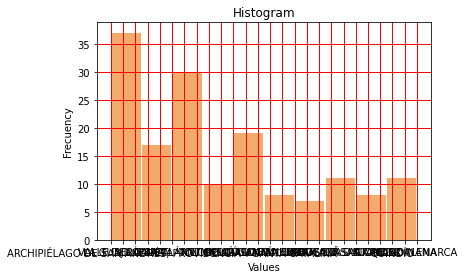

In [322]:
plt.hist(x=data['Departamento'], color= '#F2AB6D', rwidth=0.95)
plt.xlabel("Values")
plt.ylabel("Frecuency")
plt.title("Histogram")
plt.grid(color='r', linewidth=1)
plt.show()

In [323]:
plt.hist(x=data['Municipio'], color= '#F2AB6D', rwidth=0.95)
plt.xlabel("Values")
plt.ylabel("Frecuency")
plt.title("Histogram")
plt.grid(color='r', linewidth=1)
plt.show()

AttributeError: ignored

# Grafico de Barras

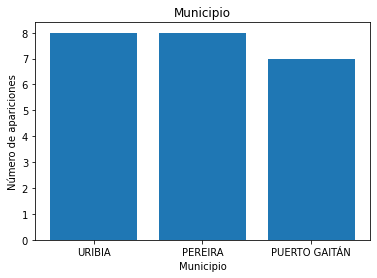

In [ ]:
con = data['Municipio'].value_counts()
top_municipio = con.nlargest(3)
data_top_municipio = data[data['Municipio'].isin(top_municipio.index)]
plt.bar(top_municipio.index, top_municipio.values)
plt.title('Municipio')
plt.xlabel('Municipio')
plt.ylabel('Número de apariciones')
plt.show()

Vemos que en la gráfica sacamos los municipios y veces que más repeticiones tienen en los datos como Uribía, Pereira, Puerto Gaitán, de más repeticiones a menos repeticiones vemos que Uribía y Pereira son los municipios que tienen la mayoría mencionado en los datos con más de 8 repeticiones.


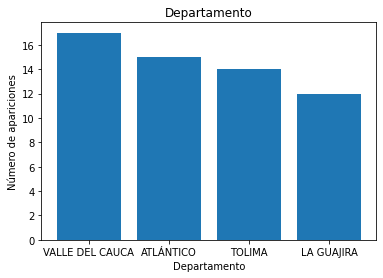

In [ ]:
con = data['Departamento'].value_counts()
top_Departamento = con.nlargest(4)
data_top_Departamento = data[data['Departamento'].isin(top_Departamento.index)]
plt.bar(top_Departamento.index, top_Departamento.values)
plt.title('Departamento')
plt.xlabel('Departamento')
plt.ylabel('Número de apariciones')
plt.show()

Podemos observar que en la grafica nos salen los departamentos y las veces que mas tienden a repetirse en la data, como son valle del cauca, Atlantico, Tolima, La guajira, los cuales vienen de mayor repiticiones a menos, podemos ver que Valle del cauca es el departamentos que mas repiticiones tiene con más de 16 repeticiones.

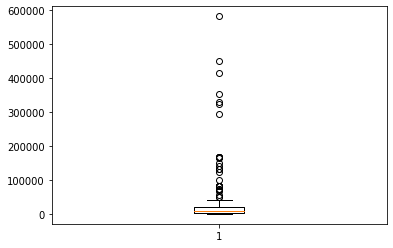

In [ ]:
plt.boxplot(data['Usuarios'])
plt.show()

In [ ]:
Q1 = data['Usuarios'].quantile(0.18)
print("Primer Cuartil", Q1)

Q3 = data['Usuarios'].quantile(0.65)
print("Tercer Cuartil", Q3)

IQR = Q3 - Q1
print("Rango Intercuartil", IQR)

Mediana = data['Usuarios'].median()
print("Mediana", Mediana)

Valor_Miniom = data['Usuarios'].min()
print("Valor Minimo", Valor_Miniom)

Valor_Maximo = data['Usuarios'].max()
print("Valor Máximo", Valor_Maximo)


Primer Cuartil 1086.42
Tercer Cuartil 16564.0
Rango Intercuartil 15477.58
Mediana 8240.0
Valor Minimo 4
Valor Máximo 582659


In [ ]:
BI_Calculado = (Q1 - 1.5 * IQR)
print("BI_CALCULADO \n", BI_Calculado)

BS_Calculado = (Q3 + 1.5 * IQR)
print("BS_CALCULADO \n", BS_Calculado)

BI_CALCULADO 
 -22129.949999999997
BS_CALCULADO 
 39780.369999999995


In [ ]:
ubicacion_outliers = ((data['Usuarios'] < BI_Calculado) | (data['Usuarios'] > BS_Calculado))
print("\n Ubicacion de Outliers \n", ubicacion_outliers)


 Ubicacion de Outliers 
 0      False
1      False
2      False
3       True
4      False
       ...  
153    False
154    False
155    False
156    False
157    False
Name: Usuarios, Length: 158, dtype: bool


In [ ]:
outliers = data[ubicacion_outliers]
print("\n Lista de Outliers \n", outliers)


 Lista de Outliers 
                                 Proyecto    Tipo  Capacidad     Departamento  \
3       EL PASO SOLAR (ENEL GREEN POWER)   Solar      67.00            CESAR   
49                          SAN FERNANDO   Solar      61.00             META   
58      LA LOMA SOLAR (ENEL GREEN POWER)   Solar     170.00            CESAR   
69          CSF SAN FELIPE (TRINA SOLAR)   Solar      90.00           TOLIMA   
73             CSF CARTAGO (TRINA SOLAR)   Solar      99.00  VALLE DEL CAUCA   
81                 CAMPANO (TRINA SOLAR)   Solar      99.90          CÓRDOBA   
88                          BETHA (EDPR)  Eólico     270.00       LA GUAJIRA   
89                          ALPHA (EDPR)  Eólico     212.00       LA GUAJIRA   
107                             RUBIALES   Solar      87.00             META   
108                     CHICAMOCHA (1-3)   Solar      59.70        SANTANDER   
109                 PUERTA DE ORO Fase 1   Solar     120.00     CUNDINAMARCA   
110               

In [ ]:
Outliers_Ordenados = outliers.sort_values("Usuarios")
Outliers_Ordenados

,Proyecto,Tipo,Capacidad,Departamento,Municipio,Código Departamento,Código Municipio,Fecha estimada FPO,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año]
148,Pubenza PSR2,Solar,50.00,BOGOTÁ D.C.,BOGOTÁ D.C.,11,11001,2023-12-31T00:00:00.000,240000,41618,187500000000,348,70080
135,CARACOLÍ I,Solar,50.00,ATLÁNTICO,MALAMBO,8,8433,2023-08-31T00:00:00.000,240000,41618,187500000000,348,70080
108,CHICAMOCHA (1-3),Solar,59.70,SANTANDER,LOS SANTOS,68,68418,2023-06-30T00:00:00.000,286560,49692,223875000000,416,83676
49,SAN FERNANDO,Solar,61.00,META,CASTILLA LA NUEVA,50,50150,2021-10-22T00:00:00.000,292800,50775,262300000000,425,85498
3,EL PASO SOLAR (ENEL GREEN POWER),Solar,67.00,CESAR,EL PASO,20,20250,2019-04-05T00:00:00.000,321600,55769,288100000000,466,93907
128,PV LA MATA,Solar,80.00,CESAR,LA GLORIA,20,20383,2023-12-31T00:00:00.000,384000,66590,344000000000,557,112128
139,TEPUY,Solar,83.00,CALDAS,LA DORADA,17,17380,2023-07-31T00:00:00.000,398400,69087,311250000000,578,116333
107,RUBIALES,Solar,87.00,META,PUERTO GAITÁN,50,50568,2023-11-30T00:00:00.000,417600,72416,326250000000,606,121939
69,CSF SAN FELIPE (TRINA SOLAR),Solar,90.00,TOLIMA,ARMERO,73,73055,2023-06-01T00:00:00.000,432000,74913,337500000000,626,126144
150,PARQUE SOLAR FOTOVOLTAICO FUNDACIÓN,Solar,99.00,MAGDALENA,FUNDACIÓN,47,47288,2024-06-30T00:00:00.000,475200,82405,371250000000,689,138758


In [ ]:
Ubicacion_sin_out = ((data['Usuarios'] >= BI_Calculado) & (data['Usuarios'] <= BS_Calculado))
sin_outliers = data[Ubicacion_sin_out]
sin_outliers

,Proyecto,Tipo,Capacidad,Departamento,Municipio,Código Departamento,Código Municipio,Fecha estimada FPO,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año]
0,JEPIRACHI,Eólico,18.42,LA GUAJIRA,URIBIA,44,44847,2004-04-27T00:00:00.000,176832,30665,79206000000,51,51635
1,AUTOG CELSIA SOLAR YUMBO,Solar,9.80,VALLE DEL CAUCA,YUMBO,76,76892,2017-03-09T00:00:00.000,47040,8157,42140000000,68,13736
2,CELSIA SOLAR BOLIVAR,Solar,8.06,BOLÍVAR,SANTA ROSA,13,13683,2019-02-01T00:00:00.000,38688,6709,34658000000,56,11297
4,SOLAR CASTILLA ECP,Solar,20.00,META,CASTILLA LA NUEVA,50,50150,2019-10-10T00:00:00.000,96000,16647,86000000000,139,28032
5,AGPE TECNOEMPAQUES DE OCCIDENTE,Solar,0.10,VALLE DEL CAUCA,CALI,76,76001,2019-12-19T00:00:00.000,480,83,430000000,1,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,BUGA 1 PARTE 2,Solar,5.94,VALLE DEL CAUCA,casanare,76,76,2022-12-31T00:00:00.000,28512,4944,22275000000,41,8326
154,BUGA 1 PARTE 1,Solar,3.96,VALLE DEL CAUCA,casanare,76,76,2022-07-31T00:00:00.000,19008,3296,14850000000,28,5550
155,REFINERÍA GRB,Solar,21.00,SANTANDER,BARRANCABERMEJA,68,68081,2023-12-31T00:00:00.000,100800,17480,78750000000,146,29434
156,EMSA GD Y AG (34 Proyectos),Solar,1.90,META,VILLAVICENCIO,50,50001,2022-05-31T00:00:00.000,9120,1582,8170000000,13,2663


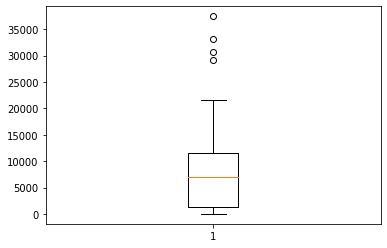

In [ ]:
plt.boxplot(x=sin_outliers['Usuarios'])
plt.show("Usuarios")
plt.show("Cantidad")

In [ ]:
Q1 = sin_outliers['Usuarios'].quantile(0.25)
print("Primer Cuartil", Q1)

Q3 = sin_outliers['Usuarios'].quantile(0.75)
print("Tercer Cuartil", Q3)

IQR = Q3 - Q1
print("Rango Intercuartil", IQR)

Mediana = sin_outliers['Usuarios'].median()
print("Mediana", Mediana)

Valor_Miniom = sin_outliers['Usuarios'].min()
print("Valor Minimo", Valor_Miniom)

Valor_Maximo = sin_outliers['Usuarios'].max()
print("Valor Máximo", Valor_Maximo)

Primer Cuartil 1249.0
Tercer Cuartil 11595.0
Rango Intercuartil 10346.0
Mediana 6975.0
Valor Minimo 4
Valor Máximo 37457


In [ ]:
BI_Calculado = (Q1 - 1.5 * IQR)
print("BI_CALCULADO \n", BI_Calculado)

BS_Calculado = (Q3 + 1.5 * IQR)
print("BS_CALCULADO \n", BS_Calculado)

BI_CALCULADO 
 -14270.0
BS_CALCULADO 
 27114.0


In [ ]:
ubicacion_outliers = ((sin_outliers['Usuarios'] < BI_Calculado) | (sin_outliers['Usuarios'] > BS_Calculado))
print("\n Ubicacion de Outliers \n", ubicacion_outliers)


 Ubicacion de Outliers 
 0       True
1      False
2      False
4      False
5      False
       ...  
153    False
154    False
155    False
156    False
157    False
Name: Usuarios, Length: 125, dtype: bool


In [ ]:
outliers = sin_outliers[ubicacion_outliers]
print("\n Lista de Outliers \n", outliers)


 Lista de Outliers 
                          Proyecto    Tipo  Capacidad        Departamento  \
0                       JEPIRACHI  Eólico      18.42          LA GUAJIRA   
57        PARQUE EÓLICO GUAJIRA I  Eólico      19.90          LA GUAJIRA   
125          SOL DE GAMARRITA 1-3   Solar      45.00               CESAR   
147  Parque Fotovoltaico Sunnorte   Solar      35.00  NORTE DE SANTANDER   

     Municipio  Código Departamento  Código Municipio  \
0       URIBIA                   44             44847   
57      URIBIA                   44             44847   
125  AGUACHICA                   20             20011   
147   casanare                   54                54   

          Fecha estimada FPO  Energía [kWh/día]  Usuarios  \
0    2004-04-27T00:00:00.000             176832     30665   
57   2021-12-31T00:00:00.000             191040     33128   
125  2023-02-09T00:00:00.000             216000     37457   
147  2023-12-31T00:00:00.000             168000     29133   

     

In [ ]:
Outliers_Ordenados = outliers.sort_values("Usuarios")
Outliers_Ordenados

,Proyecto,Tipo,Capacidad,Departamento,Municipio,Código Departamento,Código Municipio,Fecha estimada FPO,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año]
147,Parque Fotovoltaico Sunnorte,Solar,35.00,NORTE DE SANTANDER,casanare,54,54,2023-12-31T00:00:00.000,168000,29133,131250000000,244,49056
0,JEPIRACHI,Eólico,18.42,LA GUAJIRA,URIBIA,44,44847,2004-04-27T00:00:00.000,176832,30665,79206000000,51,51635
57,PARQUE EÓLICO GUAJIRA I,Eólico,19.90,LA GUAJIRA,URIBIA,44,44847,2021-12-31T00:00:00.000,191040,33128,85570000000,55,55784
125,SOL DE GAMARRITA 1-3,Solar,45.00,CESAR,AGUACHICA,20,20011,2023-02-09T00:00:00.000,216000,37457,168750000000,313,63072


In [ ]:
Ubicacion_sin_out = ((sin_outliers['Usuarios'] >= BI_Calculado) & (sin_outliers['Usuarios'] <= BS_Calculado))
sin_outliers_2 = sin_outliers[Ubicacion_sin_out]
sin_outliers_2

,Proyecto,Tipo,Capacidad,Departamento,Municipio,Código Departamento,Código Municipio,Fecha estimada FPO,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año]
1,AUTOG CELSIA SOLAR YUMBO,Solar,9.80,VALLE DEL CAUCA,YUMBO,76,76892,2017-03-09T00:00:00.000,47040,8157,42140000000,68,13736
2,CELSIA SOLAR BOLIVAR,Solar,8.06,BOLÍVAR,SANTA ROSA,13,13683,2019-02-01T00:00:00.000,38688,6709,34658000000,56,11297
4,SOLAR CASTILLA ECP,Solar,20.00,META,CASTILLA LA NUEVA,50,50150,2019-10-10T00:00:00.000,96000,16647,86000000000,139,28032
5,AGPE TECNOEMPAQUES DE OCCIDENTE,Solar,0.10,VALLE DEL CAUCA,CALI,76,76001,2019-12-19T00:00:00.000,480,83,430000000,1,140
6,RADAR FAC SAN ANDRÉS,Solar,0.01,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",SAN ANDRÉS,88,88001,2019-12-30T00:00:00.000,48,8,43000000,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,BUGA 1 PARTE 2,Solar,5.94,VALLE DEL CAUCA,casanare,76,76,2022-12-31T00:00:00.000,28512,4944,22275000000,41,8326
154,BUGA 1 PARTE 1,Solar,3.96,VALLE DEL CAUCA,casanare,76,76,2022-07-31T00:00:00.000,19008,3296,14850000000,28,5550
155,REFINERÍA GRB,Solar,21.00,SANTANDER,BARRANCABERMEJA,68,68081,2023-12-31T00:00:00.000,100800,17480,78750000000,146,29434
156,EMSA GD Y AG (34 Proyectos),Solar,1.90,META,VILLAVICENCIO,50,50001,2022-05-31T00:00:00.000,9120,1582,8170000000,13,2663


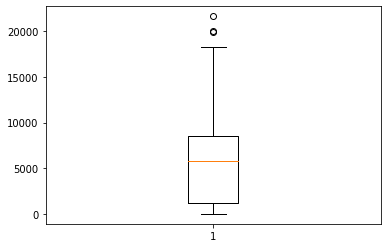

In [ ]:
plt.boxplot(x = sin_outliers_2['Usuarios'])
plt.show("Usuarios")
plt.show("Cantidad")

In [ ]:
Q1 = sin_outliers['Usuarios'].quantile(0.18)
print("Primer Cuartil", Q1)

Q3 = sin_outliers['Usuarios'].quantile(0.65)
print("Tercer Cuartil", Q3)

IQR = Q3 - Q1
print("Rango Intercuartil", IQR)

Mediana = sin_outliers['Usuarios'].median()
print("Mediana", Mediana)

Valor_Miniom = sin_outliers['Usuarios'].min()
print("Valor Minimo", Valor_Miniom)

Valor_Maximo = sin_outliers['Usuarios'].max()
print("Valor Máximo", Valor_Maximo)

Primer Cuartil 577.1200000000001
Tercer Cuartil 8240.0
Rango Intercuartil 7662.88
Mediana 6975.0
Valor Minimo 4
Valor Máximo 37457


In [ ]:
BI_Calculado = (Q1 - 1.5 * IQR)
print("BI_CALCULADO \n", BI_Calculado)

BS_Calculado = (Q3 + 1.5 * IQR)
print("BS_CALCULADO \n", BS_Calculado)

BI_CALCULADO 
 -10917.199999999999
BS_CALCULADO 
 19734.32


In [ ]:
ubicacion_outliers = ((sin_outliers['Usuarios'] < BI_Calculado) | (sin_outliers['Usuarios'] > BS_Calculado))
print("\n Ubicacion de Outliers \n", ubicacion_outliers)


 Ubicacion de Outliers 
 0       True
1      False
2      False
4      False
5      False
       ...  
153    False
154    False
155    False
156    False
157    False
Name: Usuarios, Length: 125, dtype: bool


In [ ]:
outliers = sin_outliers[ubicacion_outliers]
print("\n Lista de Outliers \n", outliers)


 Lista de Outliers 
                          Proyecto    Tipo  Capacidad        Departamento  \
0                       JEPIRACHI  Eólico      18.42          LA GUAJIRA   
41   EPM GD Y AG (1469 Proyectos)   Solar      23.92           ANTIOQUIA   
57        PARQUE EÓLICO GUAJIRA I  Eólico      19.90          LA GUAJIRA   
82                         WESP01  Eólico      12.00          LA GUAJIRA   
85        BRISAS – YAGUARÁ – AIPE   Solar      26.00               HUILA   
125          SOL DE GAMARRITA 1-3   Solar      45.00               CESAR   
147  Parque Fotovoltaico Sunnorte   Solar      35.00  NORTE DE SANTANDER   

     Municipio  Código Departamento  Código Municipio  \
0       URIBIA                   44             44847   
41    MEDELLÍN                    5              5001   
57      URIBIA                   44             44847   
82      URIBIA                   44             44847   
85     YAGUARÁ                   41             41885   
125  AGUACHICA             

In [ ]:
Outliers_Ordenados = outliers.sort_values("Usuarios")
Outliers_Ordenados

,Proyecto,Tipo,Capacidad,Departamento,Municipio,Código Departamento,Código Municipio,Fecha estimada FPO,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año]
41,EPM GD Y AG (1469 Proyectos),Solar,23.92,ANTIOQUIA,MEDELLÍN,5,5001,2022-05-31T00:00:00.000,114816,19910,102856000000,166,33526
82,WESP01,Eólico,12.00,LA GUAJIRA,URIBIA,44,44847,2022-08-05T00:00:00.000,115200,19977,51600000000,33,33638
85,BRISAS – YAGUARÁ – AIPE,Solar,26.00,HUILA,YAGUARÁ,41,41885,2022-12-31T00:00:00.000,124800,21642,97500000000,181,36442
147,Parque Fotovoltaico Sunnorte,Solar,35.00,NORTE DE SANTANDER,casanare,54,54,2023-12-31T00:00:00.000,168000,29133,131250000000,244,49056
0,JEPIRACHI,Eólico,18.42,LA GUAJIRA,URIBIA,44,44847,2004-04-27T00:00:00.000,176832,30665,79206000000,51,51635
57,PARQUE EÓLICO GUAJIRA I,Eólico,19.90,LA GUAJIRA,URIBIA,44,44847,2021-12-31T00:00:00.000,191040,33128,85570000000,55,55784
125,SOL DE GAMARRITA 1-3,Solar,45.00,CESAR,AGUACHICA,20,20011,2023-02-09T00:00:00.000,216000,37457,168750000000,313,63072


In [ ]:
Ubicacion_sin_out = ((sin_outliers['Usuarios'] >= BI_Calculado) & (sin_outliers['Usuarios'] <= BS_Calculado))
sin_outliers_2 = sin_outliers[Ubicacion_sin_out]
sin_outliers_2

,Proyecto,Tipo,Capacidad,Departamento,Municipio,Código Departamento,Código Municipio,Fecha estimada FPO,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año]
1,AUTOG CELSIA SOLAR YUMBO,Solar,9.80,VALLE DEL CAUCA,YUMBO,76,76892,2017-03-09T00:00:00.000,47040,8157,42140000000,68,13736
2,CELSIA SOLAR BOLIVAR,Solar,8.06,BOLÍVAR,SANTA ROSA,13,13683,2019-02-01T00:00:00.000,38688,6709,34658000000,56,11297
4,SOLAR CASTILLA ECP,Solar,20.00,META,CASTILLA LA NUEVA,50,50150,2019-10-10T00:00:00.000,96000,16647,86000000000,139,28032
5,AGPE TECNOEMPAQUES DE OCCIDENTE,Solar,0.10,VALLE DEL CAUCA,CALI,76,76001,2019-12-19T00:00:00.000,480,83,430000000,1,140
6,RADAR FAC SAN ANDRÉS,Solar,0.01,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",SAN ANDRÉS,88,88001,2019-12-30T00:00:00.000,48,8,43000000,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,BUGA 1 PARTE 2,Solar,5.94,VALLE DEL CAUCA,casanare,76,76,2022-12-31T00:00:00.000,28512,4944,22275000000,41,8326
154,BUGA 1 PARTE 1,Solar,3.96,VALLE DEL CAUCA,casanare,76,76,2022-07-31T00:00:00.000,19008,3296,14850000000,28,5550
155,REFINERÍA GRB,Solar,21.00,SANTANDER,BARRANCABERMEJA,68,68081,2023-12-31T00:00:00.000,100800,17480,78750000000,146,29434
156,EMSA GD Y AG (34 Proyectos),Solar,1.90,META,VILLAVICENCIO,50,50001,2022-05-31T00:00:00.000,9120,1582,8170000000,13,2663


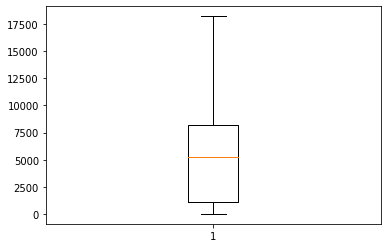

In [ ]:
plt.boxplot(x = sin_outliers_2['Usuarios'])
plt.show("Usuarios")


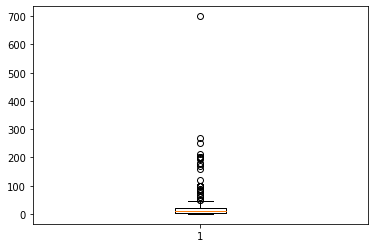

In [ ]:
plt.boxplot(data['Capacidad'])
plt.show()